In [20]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import ANN_pkg_2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [21]:
df = pd.read_excel('mtnd.xlsx')
df = df.sample(frac=1)

In [22]:
print(df.head(5))
df = df.values

    Unnamed: 0    GF   TBS   NaB    255    256    257    258    259    260  \
92          93   1.6  16.8  23.2  0.162  0.161  0.160  0.161  0.163  0.166   
36          37  14.4  25.6  10.4  0.160  0.165  0.171  0.177  0.185  0.195   
1            2   7.2   8.8   4.0  0.080  0.084  0.088  0.092  0.097  0.103   
83          84  20.8  16.0  24.0  0.217  0.222  0.229  0.237  0.248  0.260   
50          51  15.2  20.0  11.2  0.154  0.160  0.168  0.177  0.187  0.198   

    ...    276    277    278    279    280    281    282    283    284    285  
92  ...  0.227  0.224  0.219  0.211  0.200  0.188  0.174  0.158  0.140  0.121  
36  ...  0.354  0.349  0.343  0.335  0.325  0.311  0.291  0.264  0.233  0.200  
1   ...  0.187  0.183  0.179  0.174  0.167  0.157  0.144  0.127  0.109  0.092  
83  ...  0.425  0.413  0.401  0.385  0.363  0.331  0.291  0.246  0.202  0.162  
50  ...  0.363  0.355  0.347  0.337  0.323  0.301  0.273  0.238  0.202  0.168  

[5 rows x 35 columns]


In [23]:
X = df[:, 4:]
y = df[:, 1:4]
#Scale concentration columns

y = y / 10

In [24]:
# pca = PCA()
# X = pca.fit_transform(scale(X))
# X = scale(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [26]:
scaler = MinMaxScaler()

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(121, 31)
(17, 31)
(31, 31)


In [29]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
X_val = X_val.T
y_val = y_val.T

In [30]:
X_train.shape

(31, 121)

In [31]:
model = ANN_pkg_2.Neural_Network([X_train.shape[0],8,8,y_train.shape[0]], ANN_pkg_2.leaky_ReLU)


In [32]:
epochs = 100000

In [33]:
model.fit(X_train, y_train, X_test, y_test, learning_rate = 0.01, alpha = 0.00005, epochs = epochs, lr_down=True, lr_decay=100)


Loading 10.0%
Loading 20.0%
Loading 30.0%
Loading 40.0%
Loading 50.0%
Loading 60.0%
Loading 70.0%
Loading 80.0%
Loading 90.0%
Loading 100.0%
Learning process completed!!!


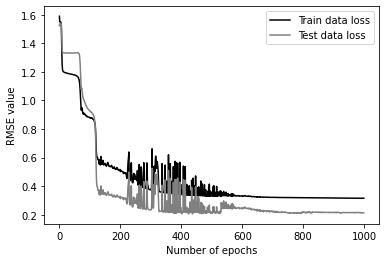

In [34]:
plt.plot(np.sqrt(model.cost_his), label = "Train data loss", color = "black")
plt.plot(np.sqrt(model.test_cost_his), label = "Test data loss", color = "gray")
# plt.xticks(np.arange(epo))
plt.xlabel("Number of epochs")  
plt.ylabel("RMSE value")
plt.legend(loc="upper right")

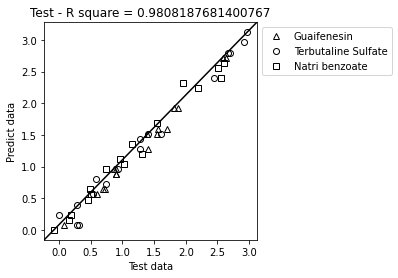

In [35]:
ANN_pred = model.forward(X_test)
plt.plot(ANN_pred[0,:].T, y_test[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[1,:].T, y_test[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[2,:].T, y_test[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Test data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Test - R square = {r2_score(y_test.T, ANN_pred.T)}")
plt.show()

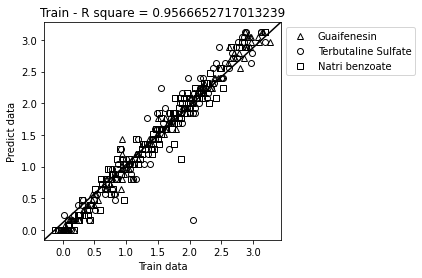

In [36]:
y_pred = model.forward(X_train)
# y_train.shape
plt.plot(y_pred[0,:].T, y_train[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_train[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_train[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Train data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Train - R square = {r2_score(y_train.T, y_pred.T)}")
plt.show()

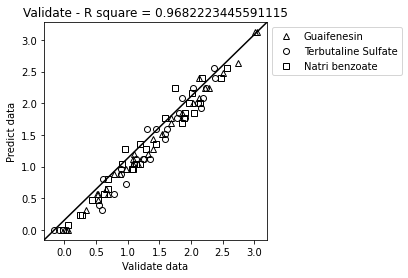

In [37]:
y_pred = model.forward(X_val)
y_pred.shape
# y_train.shape
plt.plot(y_pred[0,:].T, y_val[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_val[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_val[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Validate data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Validate - R square = {r2_score(y_val.T, y_pred.T)}")
plt.show()

In [38]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = scaler.transform(mauthuoc.iloc[:,1:].values)
mauthuoc = mauthuoc.T
model.forward(mauthuoc).T* 10

array([[56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409],
       [56.72600263,  4.07396345,  6.77774409]])